Seaborn is built on Matplotlib, it's quicker, prettier, easier for analysis.

`uv pip install seaborn`

In [1]:
# %matplotlib inline

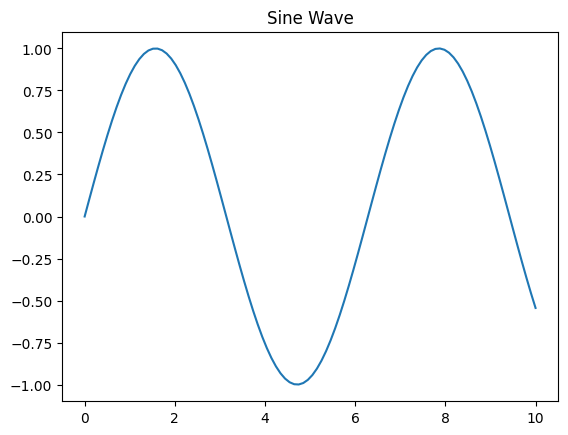

In [2]:
# Basic Line Plot

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = np.sin(x)

sns.lineplot(x=x, y=y)
plt.title("Sine Wave")
plt.show()

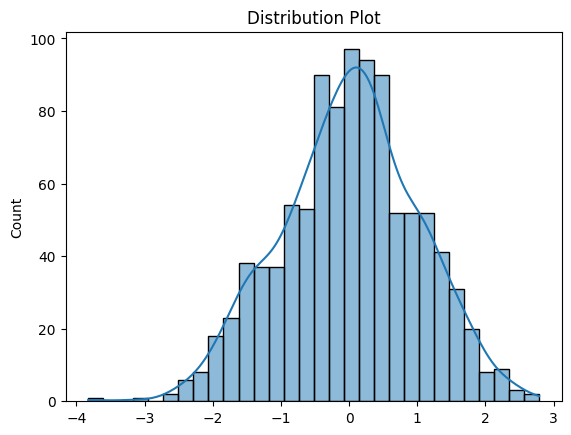

In [3]:
# Distribution Plot

data = np.random.randn(1000)

sns.histplot(data , bins=30, kde=True)
# histogram + KDE curve
plt.title("Distribution Plot")
plt.show()

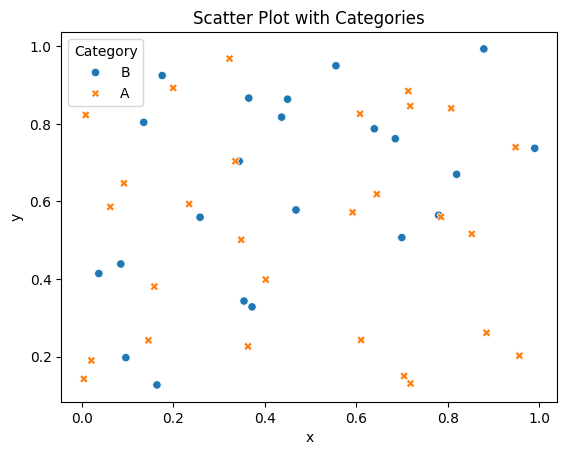

In [4]:
# Scatter Plot

import pandas as pd

# Small Dataset
df = pd.DataFrame({
    "x": np.random.rand(50),
    "y": np.random.rand(50),
    "Category": np.random.choice(["A","B"], size=50)
})

sns.scatterplot(data=df, x="x", y="y", hue="Category", style="Category")
plt.title("Scatter Plot with Categories")
plt.show()

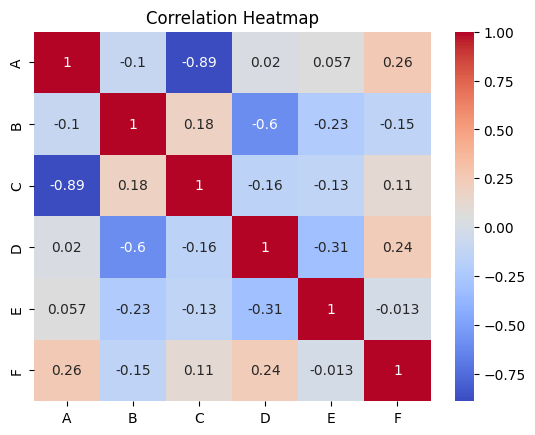

In [5]:
# Correlation Heatmap

# Fake dataset
df = pd.DataFrame(
    np.random.randn(6,6),
    columns=list("ABCDEF")
)

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

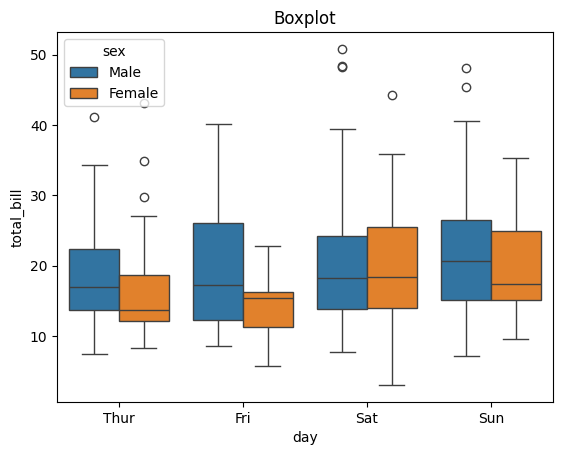

In [6]:
# Boxplot (Box and Whiskers)

tips = sns.load_dataset("tips")     # built-in dataset

sns.boxplot(data=tips, x="day", y="total_bill", hue="sex")
plt.title("Boxplot")
plt.show()

More Advanced Plots

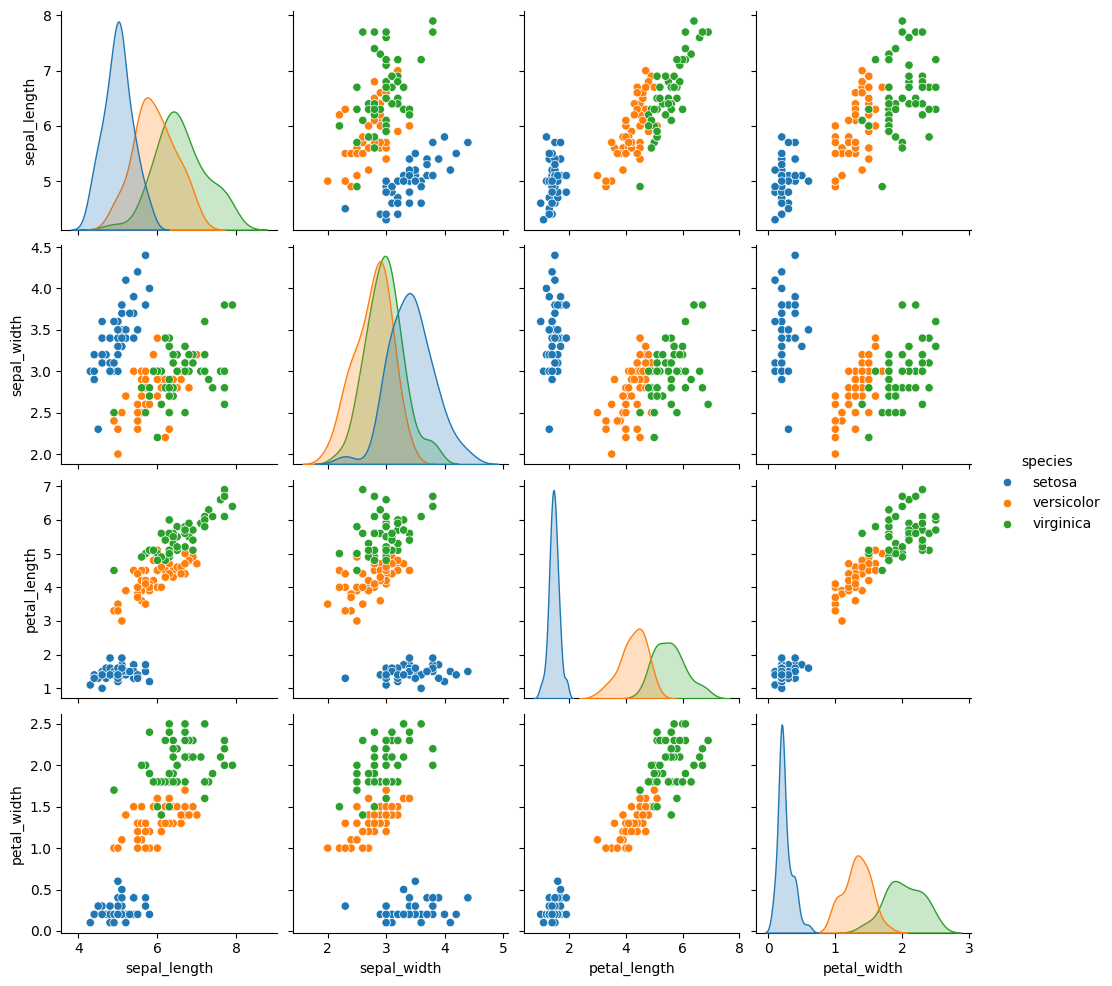

In [7]:
# Pair Plot

# Load a real dataset
iris = sns.load_dataset("iris")

# Pairplot shows scatterplots + histograms for each pair of features
sns.pairplot(iris, hue="species")

<Axes: >

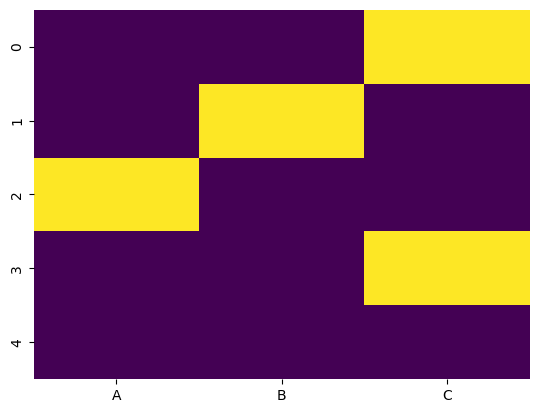

In [8]:
# Heatmap of Missing Data

# Create dummy dataset with missing values
df = pd.DataFrame({
    "A": [1, 2, np.nan, 4, 5],
    "B": [7, np.nan, 9, 10, 11],
    "C": [np.nan, 14, 15, np.nan, 17]
})

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")

<Axes: >

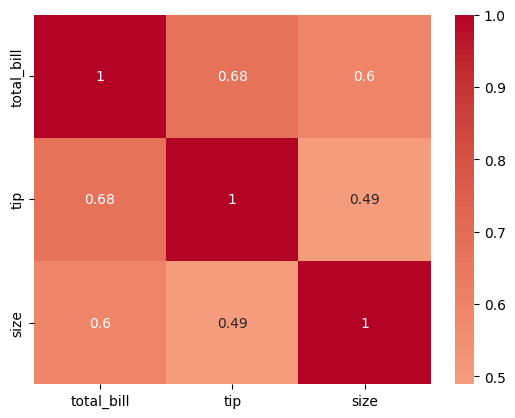

In [9]:
# Correlation Matrix Heatmap

tips = sns.load_dataset("tips")

corr = tips.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)

<Axes: xlabel='day', ylabel='total_bill'>

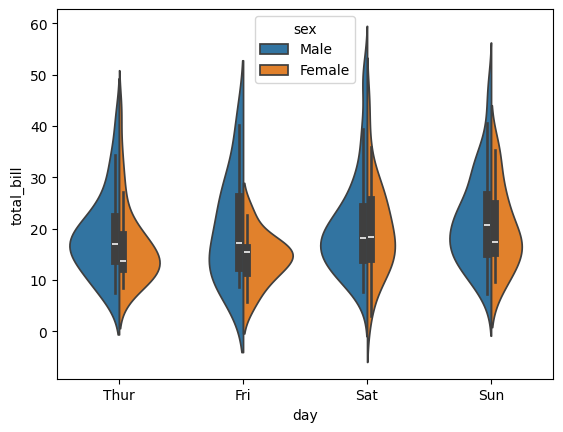

In [10]:
# Violin Plot
# boxplots + KDE (density curve)

sns.violinplot(data=tips, x="day", y="total_bill", hue="sex", split="True")

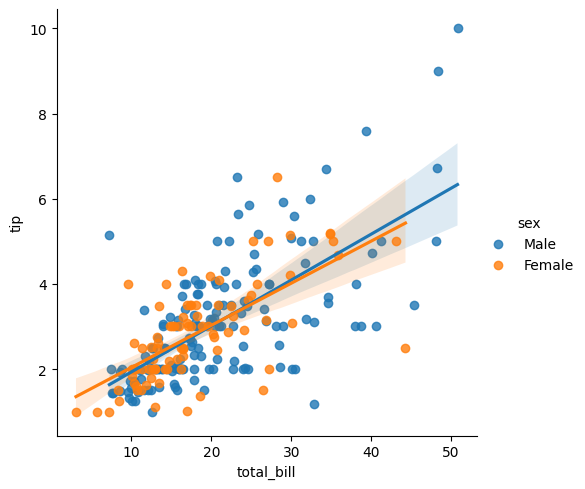

In [11]:
# Regression Plot (Trendlines)

sns.lmplot(data=tips, x="total_bill", y="tip", hue="sex")

'scipy' is required by 'clustermap'

```uv pip install scipy```

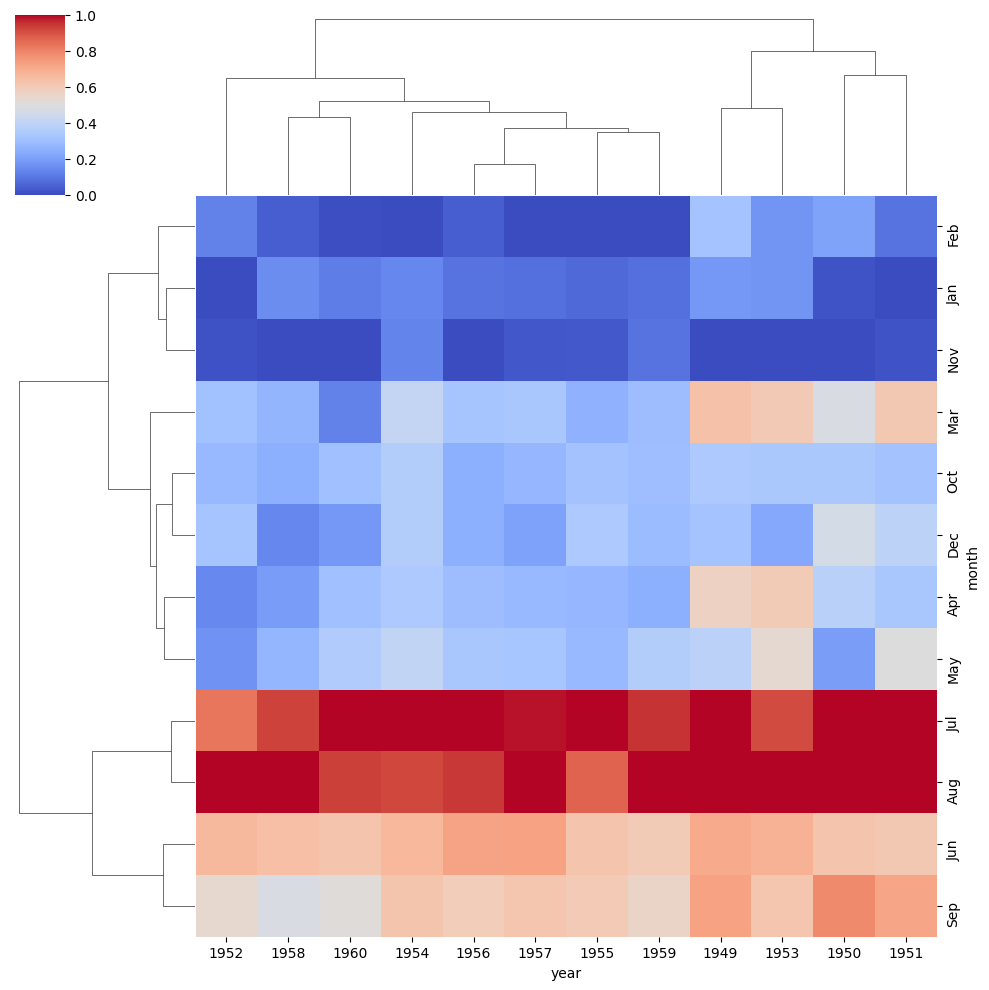

In [12]:
# Cluster Map (Hierarchical Clustering + Heatmap)

flights = sns.load_dataset("flights").pivot(index="month", columns="year", values="passengers")

sns.clustermap(flights, cmap="coolwarm", standard_scale=1)

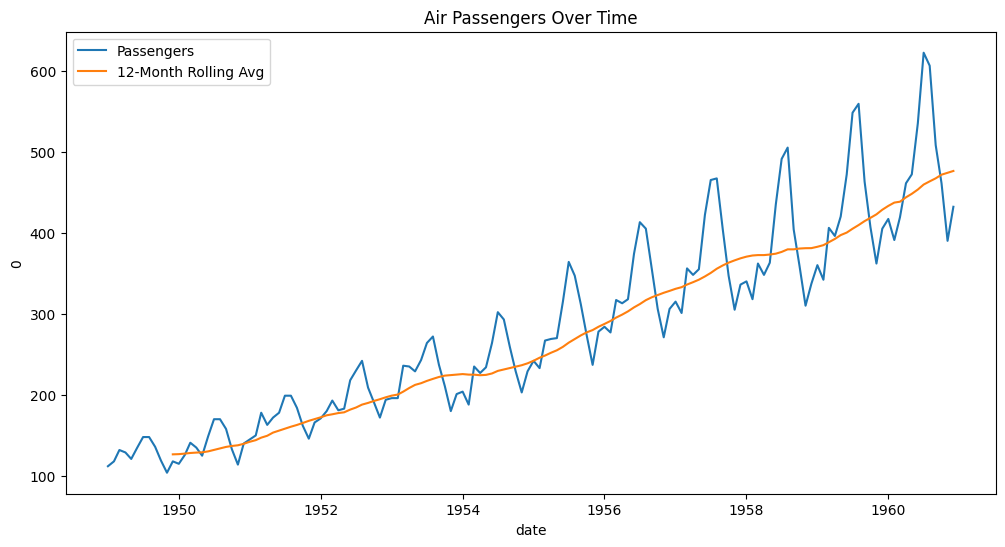

In [13]:
# Advanced Time Series Plot

# Example: monthly passengers dataset
flights = sns.load_dataset("flights")
flights = flights.pivot(index="year", columns="month", values="passengers").stack().reset_index()

# Construct date string in YYYY-Month-DD format
flights["date"] = flights["year"].astype(str) + "-" + flights["month"].astype(str) + "-01"
# Convert to datetime objects, specifying the format
flights["date"] = pd.to_datetime(flights["date"], format="%Y-%b-%d")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=flights, x="date", y=0, label="Passengers")

# Add rolling average
sns.lineplot(data=flights, x="date", y=flights[0].rolling(12).mean(), label="12-Month Rolling Avg")
plt.title("Air Passengers Over Time")
plt.show()

**Summary:**

- ***Pair Plots*** = Explore all features at once.
- ***Heatmaps*** = Missing data + correlations
- ***Violin Plots*** = Category-wise distributions
- ***Regression Plots*** = Quick statistical relationships
- ***Cluster Maps*** = Grouping features
- ***Time Series Rolling Average*** = Forevasting insights